## Introduction

One of the objectives of this notebook is to show step-by-step how to visualize the dataset and assess whether or not a new customer is likely to pay back the loan.

LendingClub, based in San Francisco, California, is a peer-to-peer lending company. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission and to provide secondary market loan trading. The largest peer-to-peer lending platform in the world is LendingClub.

###Hypothesis

We can create a model that predicts whether a borrower will pay back their loan based on past data on loans issued and information on whether or not the borrower defaulted (charge-off). This way, if we get a new potential customer in the future, we'll be able to assess whether or not they'll be able to repay the loan.

In [0]:
# File location and type
file_location = "/FileStore/tables/AcceptedLoan.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(data)

_c0 id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line fico_range_low fico_range_high inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d last_fico_range_high last_fico_range_low collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit hardship_flag disbursement_method debt_settlement_flag issue_date month_issued year_issued 0 68407277 3600 3600 3600.0 36 months 13.99 123.03 C C4 leadman 10+ years MORTGAGE 55000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68407277 null debt_consolidation Debt consolidation 190xx PA 5.91 0 Aug-03 675 679 1 30 null 7 0 2765 29.7 13.0 w 0 0.0 4421.723917 4421.72 3600.0 821.72 0.0 0.0 0.0 Jan-19 122.67 null Mar-19 564 560 0 30 1 Individual null null null 0 722 144904 2 2 0 1 21 4981 36 3 3 722 34 9300 3 1 4 4 20701 1506 37.2 0.0 0 148.0 128 3 3 1 4 69 4 69 2 2 4 2 5 3 4 9 4 7 0 0 0 3 76.9 0.0 0 0 178050 7746 2400 13734 N Cash N 01-12-15 December 2015 1 68355089 24700 24700 24700.0 36 months 11.99 820.28 C C1 Engineer 10+ years MORTGAGE 65000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68355089 null small_business Business 577xx SD 16.06 1 Dec-99 715 719 4 6 null 22 0 21470 19.2 38.0 w 0 0.0 25679.66 25679.66 24700.0 979.66 0.0 0.0 0.0 Jun-16 926.35 null Mar-19 699 695 0 null 1 Individual null null null 0 0 204396 1 1 0 1 19 18005 73 2 3 6472 29 111800 0 0 6 4 9733 57830 27.1 0.0 0 113.0 192 2 2 4 2 null 0 6 0 5 5 13 17 6 20 27 5 22 0 0 0 2 97.4 7.7 0 0 314017 39475 79300 24667 N Cash N 01-12-15 December 2015 2 68341763 20000 20000 20000.0 60 months 10.78 432.66 B B4 truck driver 10+ years MORTGAGE 63000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68341763 null home_improvement null 605xx IL 10.78 0 Aug-00 695 699 0 null null 6 0 7869 56.2 18.0 w 0 0.0 22705.92429 22705.92 20000.0 2705.92 0.0 0.0 0.0 Jun-17 15813.3 null Mar-19 704 700 0 null 1 Joint App 71000 13.85 Not Verified 0 0 189699 0 1 0 4 19 10827 73 0 2 2081 65 14000 2 5 1 6 31617 2737 55.9 0.0 0 125.0 184 14 14 5 101 null 10 null 0 2 3 2 4 6 4 7 3 6 0 0 0 0 100.0 50.0 0 0 218418 18696 6200 14877 N Cash N 01-12-15 December 2015 3 66310712 35000 35000 35000.0 60 months 14.85 829.9 C C5 Information Systems Officer 10+ years MORTGAGE 110000 Source Verified Dec-15 Current n https://lendingclub.com/browse/loanDetail.action?loan_id=66310712 null debt_consolidation Debt consolidation 076xx NJ 17.06 0 Sep-08 785 789 0 null null 13 0 7802 11.6 17.0 w 15897.65 15897.65 31464.01 31464.01 19102.35 12361.66 0.0 0.0 0.0 Feb-19 829.9 Apr-

In [0]:
# Create a view or table

temp_table_name = "AcceptedLoan_csv"

data.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `AcceptedLoan_csv`

_c0 id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line fico_range_low fico_range_high inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d last_fico_range_high last_fico_range_low collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit hardship_flag disbursement_method debt_settlement_flag issue_date month_issued year_issued 0 68407277 3600 3600 3600.0 36 months 13.99 123.03 C C4 leadman 10+ years MORTGAGE 55000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68407277 null debt_consolidation Debt consolidation 190xx PA 5.91 0 Aug-03 675 679 1 30 null 7 0 2765 29.7 13.0 w 0 0.0 4421.723917 4421.72 3600.0 821.72 0.0 0.0 0.0 Jan-19 122.67 null Mar-19 564 560 0 30 1 Individual null null null 0 722 144904 2 2 0 1 21 4981 36 3 3 722 34 9300 3 1 4 4 20701 1506 37.2 0.0 0 148.0 128 3 3 1 4 69 4 69 2 2 4 2 5 3 4 9 4 7 0 0 0 3 76.9 0.0 0 0 178050 7746 2400 13734 N Cash N 01-12-15 December 2015 1 68355089 24700 24700 24700.0 36 months 11.99 820.28 C C1 Engineer 10+ years MORTGAGE 65000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68355089 null small_business Business 577xx SD 16.06 1 Dec-99 715 719 4 6 null 22 0 21470 19.2 38.0 w 0 0.0 25679.66 25679.66 24700.0 979.66 0.0 0.0 0.0 Jun-16 926.35 null Mar-19 699 695 0 null 1 Individual null null null 0 0 204396 1 1 0 1 19 18005 73 2 3 6472 29 111800 0 0 6 4 9733 57830 27.1 0.0 0 113.0 192 2 2 4 2 null 0 6 0 5 5 13 17 6 20 27 5 22 0 0 0 2 97.4 7.7 0 0 314017 39475 79300 24667 N Cash N 01-12-15 December 2015 2 68341763 20000 20000 20000.0 60 months 10.78 432.66 B B4 truck driver 10+ years MORTGAGE 63000 Not Verified Dec-15 Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68341763 null home_improvement null 605xx IL 10.78 0 Aug-00 695 699 0 null null 6 0 7869 56.2 18.0 w 0 0.0 22705.92429 22705.92 20000.0 2705.92 0.0 0.0 0.0 Jun-17 15813.3 null Mar-19 704 700 0 null 1 Joint App 71000 13.85 Not Verified 0 0 189699 0 1 0 4 19 10827 73 0 2 2081 65 14000 2 5 1 6 31617 2737 55.9 0.0 0 125.0 184 14 14 5 101 null 10 null 0 2 3 2 4 6 4 7 3 6 0 0 0 0 100.0 50.0 0 0 218418 18696 6200 14877 N Cash N 01-12-15 December 2015 3 66310712 35000 35000 35000.0 60 months 14.85 829.9 C C5 Information Systems Officer 10+ years MORTGAGE 110000 Source Verified Dec-15 Current n https://lendingclub.com/browse/loanDetail.action?loan_id=66310712 null debt_consolidation Debt consolidation 076xx NJ 17.06 0 Sep-08 785 789 0 null null 13 0 7802 11.6 17.0 w 15897.65 15897.65 31464.01 31464.01 19102.35 12361.66 0.0 0.0 0.0 Feb-19 829.9 Apr-

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "acceptedloan_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
#from pyspark.sql.functions import to_date
#data = data.withColumn('issue_date',to_date(data.issue_date, 'dd-MM-yyyy'))

## Dataset

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

In [0]:
data.printSchema()

root
-- _c0: integer (nullable = true)
-- id: string (nullable = true)
-- loan_amnt: integer (nullable = true)
-- funded_amnt: integer (nullable = true)
-- funded_amnt_inv: double (nullable = true)
-- term: string (nullable = true)
-- int_rate: double (nullable = true)
-- installment: double (nullable = true)
-- grade: string (nullable = true)
-- sub_grade: string (nullable = true)
-- emp_title: string (nullable = true)
-- emp_length: string (nullable = true)
-- home_ownership: string (nullable = true)
-- annual_inc: string (nullable = true)
-- verification_status: string (nullable = true)
-- issue_d: string (nullable = true)
-- loan_status: string (nullable = true)
-- pymnt_plan: string (nullable = true)
-- url: string (nullable = true)
-- desc: string (nullable = true)
-- purpose: string (nullable = true)
-- title: string (nullable = true)
-- zip_code: string (nullable = true)
-- addr_state: string (nullable = true)
-- dti: string (nullable = true)
-- delinq_2yrs: string (nullable = true)
-- earliest_cr_line: string (nullable = true)
-- fico_range_low: string (nullable = true)
-- fico_range_high: integer (nullable = true)
-- inq_last_6mths: string (nullable = true)
-- mths_since_last_delinq: integer (nullable = true)
-- mths_since_last_record: integer (nullable = true)
-- open_acc: integer (nullable = true)
-- pub_rec: integer (nullable = true)
-- revol_bal: integer (nullable = true)
-- revol_util: double (nullable = true)
-- total_acc: double (nullable = true)
-- initial_list_status: string (nullable = true)
-- out_prncp: string (nullable = true)
-- out_prncp_inv: double (nullable = true)
-- total_pymnt: string (nullable = true)
-- total_pymnt_inv: double (nullable = true)
-- total_rec_prncp: double (nullable = true)
-- total_rec_int: double (nullable = true)
-- total_rec_late_fee: double (nullable = true)
-- recoveries: double (nullable = true)
-- collection_recovery_fee: double (nullable = true)
-- last_pymnt_d: string (nullable = true)
-- last_pymnt_amnt: string (nullable = true)
-- next_pymnt_d: string (nullable = true)
-- last_credit_pull_d: string (nullable = true)
-- last_fico_range_high: string (nullable = true)
-- last_fico_range_low: integer (nullable = true)
-- collections_12_mths_ex_med: string (nullable = true)
-- mths_since_last_major_derog: integer (nullable = true)
-- policy_code: integer (nullable = true)
-- application_type: string (nullable = true)
-- annual_inc_joint: string (nullable = true)
-- dti_joint: double (nullable = true)
-- verification_status_joint: string (nullable = true)
-- acc_now_delinq: integer (nullable = true)
-- tot_coll_amt: integer (nullable = true)
-- tot_cur_bal: integer (nullable = true)
-- open_acc_6m: integer (nullable = true)
-- open_act_il: integer (nullable = true)
-- open_il_12m: integer (nullable = true)
-- open_il_24m: integer (nullable = true)
-- mths_since_rcnt_il: integer (nullable = true)
-- total_bal_il: integer (nullable = true)
-- il_util: integer (nullable = true)
-- open_rv_12m: integer (nullable = true)
-- open_rv_24m: integer (nullable = true)
-- max_bal_bc: integer (nullable = true)
-- all_util: integer (nullable = true)
-- total_rev_hi_lim: integer (nullable = true)
-- inq_fi: integer (nullable = true)
-- total_cu_tl: integer (nullable = true)
-- inq_last_12m: integer (nullable = true)
-- acc_open_past_24mths: integer (nullable = true)
-- avg_cur_bal: integer (nullable = true)
-- bc_open_to_buy: integer (nullable = true)
-- bc_util: double (nullable = true)
-- chargeoff_within_12_mths: double (nullable = true)
-- delinq_amnt: integer (nullable = true)
-- mo_sin_old_il_acct: double (nullable = true)
-- mo_sin_old_rev_tl_op: integer (nullable = true)
-- mo_sin_rcnt_rev_tl_op: integer (nullable = true)
-- mo_sin_rcnt_tl: integer (nullable = true)
-- mort_acc: integer (nullable = true)
-- mths_since_recent_bc: integer (nullable = true)
-- mths_since_recent_bc_dlq: integer (nullable = true)
-- mths_since_recent_inq: integer (nullable = true)
-- mths_since_recent_r

In [0]:
data = data.select(                                        
 "id",                                   
 "loan_amnt",                                   
 "funded_amnt",                                 
 "funded_amnt_inv",                            
 "term",                                        
 "int_rate",                                    
 "installment",                                 
 "grade",   
 "issue_d",  
 "sub_grade",                                   
 "emp_title",                                    
 "emp_length",                                  
 "home_ownership",                              
 "annual_inc",                                  
 "verification_status",                                                      
 "loan_status",                                  
 "pymnt_plan",                                   
 "url",                                         
 "desc",                                        
 "purpose",                                      
 "title",                                        
 "zip_code",                                    
 "addr_state",
 "issue_date",
 "year_issued",
 "month_issued",
 "policy_code",                              
"dti",                                        
"delinq_2yrs",   
"fico_range_low",                              
"fico_range_high",                             
"inq_last_6mths",                              
"mths_since_last_delinq",                      
"mths_since_last_record",                      
"open_acc",                                    
"pub_rec",                                     
"revol_bal",                                   
"revol_util",                                  
"total_acc",
"out_prncp",                                   
"out_prncp_inv",                               
"total_pymnt",                                 
"total_pymnt_inv",                             
"total_rec_prncp",                             
"total_rec_int",                               
"total_rec_late_fee",                          
"recoveries",                                  
"collection_recovery_fee",  
"last_pymnt_amnt",                                 
)

display(data)

id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade issue_d sub_grade emp_title emp_length home_ownership annual_inc verification_status loan_status pymnt_plan url desc purpose title zip_code addr_state issue_date year_issued month_issued policy_code dti delinq_2yrs fico_range_low fico_range_high inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_amnt 68407277 3600 3600 3600.0 36 months 13.99 123.03 C Dec-15 C4 leadman 10+ years MORTGAGE 55000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68407277 null debt_consolidation Debt consolidation 190xx PA 01-12-15 2015 December 1 5.91 0 675 679 1 30 null 7 0 2765 29.7 13.0 0 0.0 4421.723917 4421.72 3600.0 821.72 0.0 0.0 0.0 122.67 68355089 24700 24700 24700.0 36 months 11.99 820.28 C Dec-15 C1 Engineer 10+ years MORTGAGE 65000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68355089 null small_business Business 577xx SD 01-12-15 2015 December 1 16.06 1 715 719 4 6 null 22 0 21470 19.2 38.0 0 0.0 25679.66 25679.66 24700.0 979.66 0.0 0.0 0.0 926.35 68341763 20000 20000 20000.0 60 months 10.78 432.66 B Dec-15 B4 truck driver 10+ years MORTGAGE 63000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68341763 null home_improvement null 605xx IL 01-12-15 2015 December 1 10.78 0 695 699 0 null null 6 0 7869 56.2 18.0 0 0.0 22705.92429 22705.92 20000.0 2705.92 0.0 0.0 0.0 15813.3 66310712 35000 35000 35000.0 60 months 14.85 829.9 C Dec-15 C5 Information Systems Officer 10+ years MORTGAGE 110000 Source Verified Current n https://lendingclub.com/browse/loanDetail.action?loan_id=66310712 null debt_consolidation Debt consolidation 076xx NJ 01-12-15 2015 December 1 17.06 0 785 789 0 null null 13 0 7802 11.6 17.0 15897.65 15897.65 31464.01 31464.01 19102.35 12361.66 0.0 0.0 0.0 829.9 68476807 10400 10400 10400.0 60 months 22.45 289.91 F Dec-15 F1 Contract Specialist 3 years MORTGAGE 104433 Source Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68476807 null major_purchase Major purchase 174xx PA 01-12-15 2015 December 1 25.37 1 695 699 3 12 null 12 0 21929 64.5 35.0 0 0.0 11740.5 11740.5 10400.0 1340.5 0.0 0.0 0.0 10128.96 68426831 11950 11950 11950.0 36 months 13.44 405.18 C Dec-15 C3 Veterinary Tecnician 4 years RENT 34000 Source Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68426831 null debt_consolidation Debt consolidation 300xx GA 01-12-15 2015 December 1 10.2 0 690 694 0 null null 5 0 8822 68.4 6.0 0 0.0 13708.94853 13708.95 11950.0 1758.95 0.0 0.0 0.0 7653.56 68476668 20000 20000 20000.0 36 months 9.17 637.58 B Dec-15 B2 Vice President of Recruiting Operations 10+ years MORTGAGE 180000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68476668 null debt_consolidation Debt consolidation 550xx MN 01-12-15 2015 December 1 14.67 0 680 684 0 49 null 12 0 87329 84.5 27.0 0 0.0 21393.8 21393.8 20000.0 1393.8 0.0 0.0 0.0 15681.05 67275481 20000 20000 20000.0 36 months 8.49 631.26 B Dec-15 B1 road driver 10+ years MORTGAGE 85000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=67275481 null major_purchase Major purchase 293xx SC 01-12-15 2015 December 1 17.61 1 705 709 0 3 null 8 0 826 5.7 15.0 0 0.0 21538.50898 21538.51 20000.0 1538.51 0.0 0.0 0.0 14618.23 68466926 10000 10000 10000.0 36 months 6.49 306.45 A Dec-15 A2 SERVICE MANAGER 6 years RENT 85000 Not Verified Fully Paid n https://lendingclub.com/browse/loanDetail.action?loan_id=68466926 null credit_card Credit card refinancing 160xx PA 01-12-15 2015 December 1 13.07 0 685 689 1 null 106 14 1 10464 34.5 23.0 0 0.0 10998.97157 10998.97 10000.0 998.97 0.0 0.0 0.0 1814.48 68616873 8000 8000 8

In [0]:
#Convert pyspark data frame to pandas 
result = data.toPandas()
result

id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 
 
 
 
 0 
 68407277 
 3600.0 
 3600.0 
 3600.0 
 36 months 
 13.99 
 123.03 
 C 
 Dec-15 
 C4 
 leadman 
 10+ years 
 MORTGAGE 
 55000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 190xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 5.91 
 0 
 675 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 
 
 1 
 68355089 
 24700.0 
 24700.0 
 24700.0 
 36 months 
 11.99 
 820.28 
 C 
 Dec-15 
 C1 
 Engineer 
 10+ years 
 MORTGAGE 
 65000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 small_business 
 Business 
 577xx 
 SD 
 01-12-15 
 2015 
 December 
 1.0 
 16.06 
 1 
 715 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 
 
 2 
 68341763 
 20000.0 
 20000.0 
 20000.0 
 60 months 
 10.78 
 432.66 
 B 
 Dec-15 
 B4 
 truck driver 
 10+ years 
 MORTGAGE 
 63000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 home_improvement 
 None 
 605xx 
 IL 
 01-12-15 
 2015 
 December 
 1.0 
 10.78 
 0 
 695 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 
 
 3 
 66310712 
 35000.0 
 35000.0 
 35000.0 
 60 months 
 14.85 
 829.90 
 C 
 Dec-15 
 C5 
 Information Systems Officer 
 10+ years 
 MORTGAGE 
 110000 
 Source Verified 
 Current 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 076xx 
 NJ 
 01-12-15 
 2015 
 December 
 1.0 
 17.06 
 0 
 785 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 
 
 4 
 68476807 
 10400.0 
 10400.0 
 10400.0 
 60 months 
 22.45 
 289.91 
 F 
 Dec-15 
 F1 
 Contract Specialist 
 3 years 
 MORTGAGE 
 104433 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 major_purchase 
 Major purchase 
 174xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 25.37 
 1 
 695 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 72663394 
 14400.0 
 14400.0 
 14400.0 
 36 months 
 16.29 
 508.33 
 D 
 Feb-16 
 D1 
 Purchasing manager 
 10+ years 
 RENT 
 45000 
 Not Verified 
 Charged Off 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 credit_card 
 Credit card refinancing 
 168xx 
 PA 
 01-02-16 
 2016 
 February 
 1.0 
 33.76 
 0 
 675 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 
 
 1048571 
 72673678 
 10000.0 
 10000.0 
 10000.0 
 36 months 
 11.47 
 329.62 
 B 
 Feb-16 
 B5 
 E6 
 10+ years 
 MOR

In [0]:
#Get unique grade value 
result['grade'].unique()

Out[14]: [C, B, F, A, E, D, G, NaN]
Categories (7, object): [C, B, F, A, E, D, G]

In [0]:
import pandas as pd

# Categorize the grade into nymerical value
result.grade = pd.Categorical(result.grade)
result['grade_level'] = result.grade.cat.codes

result.head(1)

id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 0 
 68407277 
 3600.0 
 3600.0 
 3600.0 
 36 months 
 13.99 
 123.03 
 C 
 Dec-15 
 C4 
 leadman 
 10+ years 
 MORTGAGE 
 55000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 190xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 5.91 
 0 
 675 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.0 
 4421.723917 
 4421.72 
 3600.0 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 2

In [0]:
result['grade_level'].unique()

Out[16]: array([ 2, 1, 5, 0, 4, 3, 6, -1], dtype=int8)

In [0]:
#Sort the dataset by grade level associated with the loan
result.sort_values("grade_level")

id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 528961 
 Total amount funded in policy code 1: 1741781700 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 -1 
 
 
 877717 
 Total amount funded in policy code 2: 823319310 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 -1 
 
 
 651664 
 Total amount funded in policy code 1: 1791201400 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 -1 
 
 
 651665 
 Total amount funded in policy code 2: 651669342 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 -1 
 
 
 421095 
 Total amount funded in policy code 1: 6417608175 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 NaN 
 None 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 None 
 -1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 154774 
 59262180 
 21500.0 
 21500.0 
 21500.0 
 60 months 
 26.77 
 653.56 
 G 
 Sep-15 
 G1 
 teacher 
 10+ years 
 OWN 
 43000 
 Verified 
 Charged Off 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 811xx 
 CO 
 01-09-15 
 2015 
 September 
 1.0 
 25.39 
 0 
 670 
 674.0 
 2 
 41.0 
 NaN 
 18.0 
 0.0 
 6115.0 
 52.3 
 57.0 
 0 
 0.0 
 14122 
 14122.00 
 3058.53 
 6664.93 
 0.0 
 4398.54 
 791.7372 
 653.56 
 6 
 
 
 704619 
 77952059 
 17200.0 
 17200.0 
 17200.0 
 60 months 
 30.99 
 566.99 
 G 
 May-16 
 G5 
 Contact Representative 
 1 year 
 RENT 
 41000 
 Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 None 
 641xx 
 MO 
 01-05-16 
 2016 
 May 
 1.0 
 35.25 
 0 
 705 
 709.0 
 0 
 63.0 
 NaN 
 8.0 
 0.0 
 7914.0 
 58.2 
 42.0 
 0 
 0.0 
 18655.55002 
 18655.55 
 17200.00 
 1455.55 
 0.0 
 0.00 
 0.0000 
 2734.19 
 6 
 
 
 597952 
 114430268 
 14425.0 
 14425.0 
 14425.0 
 36 months 
 30.99 
 620.22 
 G 
 Aug-17 
 G5 
 Inventory Mgr 
 1

In [0]:
#Delete rows where grade value is -1
result.drop(result[result['grade_level'] ==-1].index, inplace = True)
result

id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 0 
 68407277 
 3600.0 
 3600.0 
 3600.0 
 36 months 
 13.99 
 123.03 
 C 
 Dec-15 
 C4 
 leadman 
 10+ years 
 MORTGAGE 
 55000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 190xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 5.91 
 0 
 675 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 2 
 
 
 1 
 68355089 
 24700.0 
 24700.0 
 24700.0 
 36 months 
 11.99 
 820.28 
 C 
 Dec-15 
 C1 
 Engineer 
 10+ years 
 MORTGAGE 
 65000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 small_business 
 Business 
 577xx 
 SD 
 01-12-15 
 2015 
 December 
 1.0 
 16.06 
 1 
 715 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 2 
 
 
 2 
 68341763 
 20000.0 
 20000.0 
 20000.0 
 60 months 
 10.78 
 432.66 
 B 
 Dec-15 
 B4 
 truck driver 
 10+ years 
 MORTGAGE 
 63000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 home_improvement 
 None 
 605xx 
 IL 
 01-12-15 
 2015 
 December 
 1.0 
 10.78 
 0 
 695 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 1 
 
 
 3 
 66310712 
 35000.0 
 35000.0 
 35000.0 
 60 months 
 14.85 
 829.90 
 C 
 Dec-15 
 C5 
 Information Systems Officer 
 10+ years 
 MORTGAGE 
 110000 
 Source Verified 
 Current 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 076xx 
 NJ 
 01-12-15 
 2015 
 December 
 1.0 
 17.06 
 0 
 785 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 2 
 
 
 4 
 68476807 
 10400.0 
 10400.0 
 10400.0 
 60 months 
 22.45 
 289.91 
 F 
 Dec-15 
 F1 
 Contract Specialist 
 3 years 
 MORTGAGE 
 104433 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 major_purchase 
 Major purchase 
 174xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 25.37 
 1 
 695 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 5 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 72663394 
 14400.0 
 14400.0 
 14400.0 
 36 months 
 16.29 
 508.33 
 D 
 Feb-16 
 D1 
 Purchasing manager 
 10+ years 
 RENT 
 45000 
 Not Verified 
 Charged Off 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 credit_card 
 Credit card refinancing 
 168xx 
 PA 
 01-02-16 
 2016 
 February 
 1.0 
 33.76 
 0 
 675 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 3 
 
 
 1048571 
 72673678 
 10000.0 
 10000.0 
 10000.0 
 36 months 
 11.47 
 329

In [0]:
#result of the grade level category
result['grade_level'].unique()

Out[19]: array([2, 1, 5, 0, 4, 3, 6], dtype=int8)

In [0]:
#drop rows where month issued equals Cash, None, '01-10-15'

result.drop(result.index[result['month_issued'] == '01-10-15'], inplace=True)
result.drop(result.index[result['month_issued'] == 'Cash'], inplace=True)
result.drop(result.index[result['month_issued'] == 'None'], inplace=True)



In [0]:
result['month_issued'].unique()

Out[21]: array(['December', 'November', 'October', 'September', 'August', 'July',
 'June', 'May', 'April', 'March', 'February', 'January'],
 dtype=object)

In [0]:
result['loan_status'].unique()

Out[22]: array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
 'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [0]:
result.loc[result['loan_status'] == 'Default']

id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 33636 
 66510505 
 35000.0 
 35000.0 
 35000.0 
 60 months 
 20.99 
 946.68 
 E 
 Dec-15 
 E5 
 Support Officer 
 10+ years 
 OWN 
 105000 
 Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 207xx 
 MD 
 01-12-15 
 2015 
 December 
 1.0 
 25.36 
 0 
 675 
 679.0 
 0 
 NaN 
 NaN 
 20.0 
 0.0 
 19782.0 
 98.9 
 60.0 
 21999.94 
 21999.94 
 30603.57 
 30603.57 
 13000.06 
 17556.18 
 47.33 
 0.0 
 0.0 
 946.68 
 4 
 
 
 427432 
 130554933 
 30000.0 
 30000.0 
 30000.0 
 36 months 
 17.47 
 1076.62 
 D 
 Mar-18 
 D1 
 OWNER 
 10+ years 
 OWN 
 70000 
 Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 068xx 
 CT 
 01-03-18 
 2018 
 March 
 1.0 
 23.26 
 0 
 730 
 734.0 
 0 
 40.0 
 NaN 
 8.0 
 0.0 
 19359.0 
 61.5 
 14.0 
 25320.47 
 25320.47 
 7507.22 
 7507.22 
 4679.53 
 2827.69 
 0.00 
 0.0 
 0.0 
 1076.62 
 3 
 
 
 487676 
 128147895 
 25000.0 
 25000.0 
 25000.0 
 60 months 
 21.45 
 682.68 
 D 
 Feb-18 
 D5 
 Bus Operator 
 8 years 
 RENT 
 36000 
 Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 330xx 
 FL 
 01-02-18 
 2018 
 February 
 1.0 
 2.2 
 1 
 700 
 704.0 
 1 
 19.0 
 58.0 
 3.0 
 1.0 
 923.0 
 18.5 
 12.0 
 22991.22 
 22991.22 
 6832.88 
 6832.88 
 2008.78 
 4789.97 
 34.13 
 0.0 
 0.0 
 1401.23 
 3 
 
 
 492124 
 127591076 
 10000.0 
 10000.0 
 10000.0 
 60 months 
 19.03 
 259.58 
 D 
 Jan-18 
 D3 
 Security 
 < 1 year 
 RENT 
 30000 
 Source Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 103xx 
 NY 
 01-01-18 
 2018 
 January 
 1.0 
 33.28 
 0 
 755 
 759.0 
 0 
 NaN 
 NaN 
 14.0 
 0.0 
 7993.0 
 12.4 
 28.0 
 9032.08 
 9032.08 
 2325.65 
 2325.65 
 967.92 
 1357.73 
 0.00 
 0.0 
 0.0 
 259.58 
 3 
 
 
 521690 
 126477470 
 3000.0 
 3000.0 
 3000.0 
 36 months 
 19.03 
 110.02 
 D 
 Jan-18 
 D3 
 Detailer 
 4 years 
 RENT 
 35000 
 Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 other 
 Other 
 986xx 
 WA 
 01-01-18 
 2018 
 January 
 1.0 
 0.86 
 0 
 660 
 664.0 
 0 
 64.0 
 NaN 
 13.0 
 0.0 
 311.0 
 31.1 
 18.0 
 2305.04 
 2305.04 
 1327.01 
 1327.01 
 694.96 
 587.05 
 45.00 
 0.0 
 0.0 
 300 
 3 
 
 
 550732 
 118632698 
 20000.0 
 20000.0 
 20000.0 
 60 months 
 25.82 
 596.68 
 E 
 Sep-17 
 E4 
 senior consultant 
 2 years 
 MORTGAGE 
 37000 
 Not Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 home_improvement 
 Home improvement 
 754xx 
 TX 
 01-09-17 
 2017 
 September 
 1.0 
 10.7 
 0 
 800 
 804.0 
 0 
 76.0 
 NaN 
 8.0 
 0.0 
 1261.0 
 9.3 
 14.0 
 9321.75 
 9321.75 
 15962.1 
 15962.10 
 10678.25 
 5283.85 
 0.00 
 0.0 
 0.0 
 597 
 4 
 
 
 553787 
 118651955 
 10000.0 
 10000.0 
 10000.0 
 60 months 
 20.00 
 264.94 
 D 
 Sep-17 
 D4 
 Delinquency Management Call center Agent 
 < 1 year 
 MORTGAGE 
 30000 
 Not Verified 
 Default 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 973xx 
 OR 
 01-09-17 
 2017 
 September 
 1.0 
 19.88 
 0 
 780 
 784.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 

In [0]:
result.describe

Out[24]: <bound method NDFrame.describe of id loan_amnt ... last_pymnt_amnt grade_level
0 68407277 3600.0 ... 122.67 2
1 68355089 24700.0 ... 926.35 2
2 68341763 20000.0 ... 15813.3 1
3 66310712 35000.0 ... 829.9 2
4 68476807 10400.0 ... 10128.96 5
... ... ... ... ... ...
1048570 72663394 14400.0 ... 508.33 3
1048571 72673678 10000.0 ... 1002.22 1
1048572 72663353 16000.0 ... 2303.27 1
1048573 72785737 6000.0 ... 187.47 0
1048574 72573375 1000.0 ... 904.33 0

[1048561 rows x 50 columns]>

In [0]:
import datetime
import calendar

result['month_issued'] = pd.Categorical(result['month_issued'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
result.sort_values("month_issued")



id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 524283 
 126557979 
 6000.0 
 6000.0 
 6000.0 
 36 months 
 13.59 
 203.88 
 C 
 Jan-18 
 C2 
 General manager 
 3 years 
 OWN 
 69000 
 Source Verified 
 Current 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 120xx 
 NY 
 01-01-18 
 2018 
 January 
 1.0 
 37.67 
 0 
 780 
 784.0 
 1 
 NaN 
 NaN 
 12.0 
 0.0 
 3949.0 
 21.6 
 30.0 
 3950.35 
 3950.35 
 2845.26 
 2845.26 
 2049.65 
 795.61 
 0.0 
 0.00 
 0.0000 
 203.88 
 2 
 
 
 395427 
 39570567 
 10000.0 
 10000.0 
 10000.0 
 36 months 
 10.49 
 324.98 
 B 
 Jan-15 
 B3 
 OWNER 
 8 years 
 MORTGAGE 
 70000 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 credit_card 
 Credit card refinancing 
 871xx 
 NM 
 01-01-15 
 2015 
 January 
 1.0 
 18.77 
 0 
 680 
 684.0 
 0 
 NaN 
 17.0 
 4.0 
 1.0 
 2457.0 
 68.2 
 5.0 
 0 
 0.00 
 11634.1775 
 11634.18 
 10000.00 
 1634.18 
 0.0 
 0.00 
 0.0000 
 2221.42 
 1 
 
 
 395426 
 39670423 
 14000.0 
 14000.0 
 14000.0 
 60 months 
 11.99 
 311.36 
 B 
 Jan-15 
 B5 
 Sales Manager 
 2 years 
 MORTGAGE 
 110000 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 430xx 
 OH 
 01-01-15 
 2015 
 January 
 1.0 
 23.22 
 0 
 745 
 749.0 
 3 
 36.0 
 NaN 
 20.0 
 0.0 
 101319.0 
 13.4 
 62.0 
 0 
 0.00 
 16039.04 
 16039.04 
 14000.00 
 2039.04 
 0.0 
 0.00 
 0.0000 
 11377.97 
 1 
 
 
 395425 
 38656999 
 14600.0 
 14600.0 
 14600.0 
 60 months 
 17.86 
 369.64 
 D 
 Jan-15 
 D5 
 heavy machinery mechanic 
 10+ years 
 MORTGAGE 
 50000 
 Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 credit_card 
 Credit card refinancing 
 195xx 
 PA 
 01-01-15 
 2015 
 January 
 1.0 
 15.65 
 0 
 685 
 689.0 
 1 
 68.0 
 NaN 
 12.0 
 0.0 
 7678.0 
 42.9 
 24.0 
 0 
 0.00 
 21815.25706 
 21815.26 
 14600.00 
 7215.26 
 0.0 
 0.00 
 0.0000 
 1587.03 
 3 
 
 
 395424 
 39750763 
 24000.0 
 24000.0 
 24000.0 
 36 months 
 8.19 
 754.18 
 A 
 Jan-15 
 A5 
 Policy Analyst 
 < 1 year 
 MORTGAGE 
 191000 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 206xx 
 MD 
 01-01-15 
 2015 
 January 
 1.0 
 11.93 
 0 
 675 
 679.0 
 1 
 74.0 
 NaN 
 11.0 
 0.0 
 23175.0 
 69.0 
 25.0 
 0 
 0.00 
 27139.48537 
 27139.49 
 24000.00 
 3139.49 
 0.0 
 0.00 
 0.0000 
 754.11 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 31204 
 66601632 
 6400.0 
 6400.0 
 6400.0 
 36 months 
 10.64 
 208.44 
 B 
 Dec-15 
 B4 
 plant operator 
 1 year 
 RENT 
 40000 
 Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 car 
 Car financing 
 290xx 
 SC 
 01-12-15 
 2015 
 December 
 1.0 
 23.52 
 0 
 690 
 694.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 15438.0 
 76.8 
 14.0 
 0 
 0.00 
 7189.436862 
 7189.44 
 6400.00 
 789.44 
 0.0 
 0.00 
 0.0000 
 3861.97 
 1 
 
 
 31203 
 66591524 
 15000.0 
 15000.0

##Exploratory Data Analysis

Exploratory Data Analysis is an approach in analyzing data sets to summarize their main characteristics,

In [0]:
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
#import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

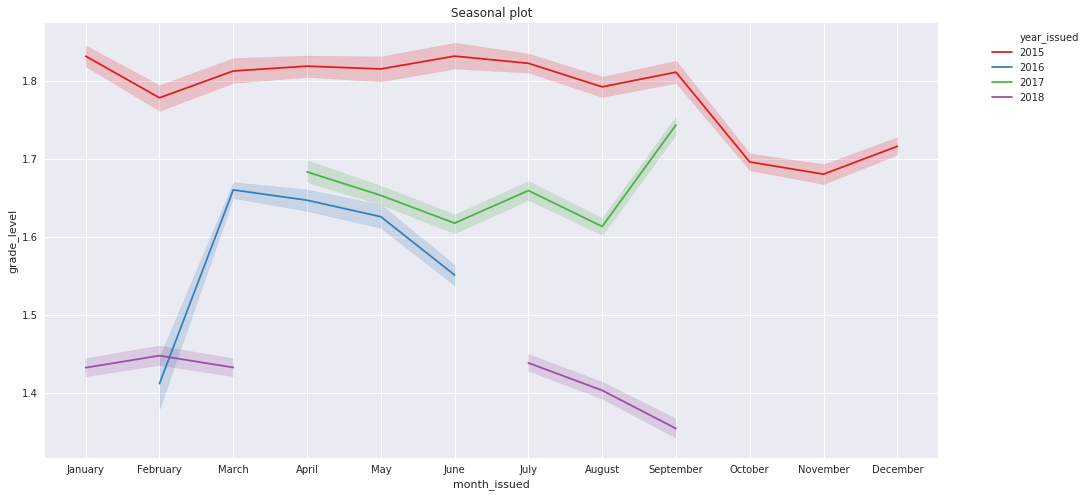

In [0]:
# plot with seaborn
sns.lineplot(data=result, 
             x='month_issued', 
             y='grade_level', 
             hue='year_issued', 
             legend='full', palette="Set1")

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In [0]:
loan_status_df = result
loan_status_df


id 
 loan_amnt 
 funded_amnt 
 funded_amnt_inv 
 term 
 int_rate 
 installment 
 grade 
 issue_d 
 sub_grade 
 emp_title 
 emp_length 
 home_ownership 
 annual_inc 
 verification_status 
 loan_status 
 pymnt_plan 
 url 
 desc 
 purpose 
 title 
 zip_code 
 addr_state 
 issue_date 
 year_issued 
 month_issued 
 policy_code 
 dti 
 delinq_2yrs 
 fico_range_low 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 grade_level 
 
 
 
 
 0 
 68407277 
 3600.0 
 3600.0 
 3600.0 
 36 months 
 13.99 
 123.03 
 C 
 Dec-15 
 C4 
 leadman 
 10+ years 
 MORTGAGE 
 55000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 190xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 5.91 
 0 
 675 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 2 
 
 
 1 
 68355089 
 24700.0 
 24700.0 
 24700.0 
 36 months 
 11.99 
 820.28 
 C 
 Dec-15 
 C1 
 Engineer 
 10+ years 
 MORTGAGE 
 65000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 small_business 
 Business 
 577xx 
 SD 
 01-12-15 
 2015 
 December 
 1.0 
 16.06 
 1 
 715 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 2 
 
 
 2 
 68341763 
 20000.0 
 20000.0 
 20000.0 
 60 months 
 10.78 
 432.66 
 B 
 Dec-15 
 B4 
 truck driver 
 10+ years 
 MORTGAGE 
 63000 
 Not Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 home_improvement 
 None 
 605xx 
 IL 
 01-12-15 
 2015 
 December 
 1.0 
 10.78 
 0 
 695 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 1 
 
 
 3 
 66310712 
 35000.0 
 35000.0 
 35000.0 
 60 months 
 14.85 
 829.90 
 C 
 Dec-15 
 C5 
 Information Systems Officer 
 10+ years 
 MORTGAGE 
 110000 
 Source Verified 
 Current 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 debt_consolidation 
 Debt consolidation 
 076xx 
 NJ 
 01-12-15 
 2015 
 December 
 1.0 
 17.06 
 0 
 785 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 2 
 
 
 4 
 68476807 
 10400.0 
 10400.0 
 10400.0 
 60 months 
 22.45 
 289.91 
 F 
 Dec-15 
 F1 
 Contract Specialist 
 3 years 
 MORTGAGE 
 104433 
 Source Verified 
 Fully Paid 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 major_purchase 
 Major purchase 
 174xx 
 PA 
 01-12-15 
 2015 
 December 
 1.0 
 25.37 
 1 
 695 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 5 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 72663394 
 14400.0 
 14400.0 
 14400.0 
 36 months 
 16.29 
 508.33 
 D 
 Feb-16 
 D1 
 Purchasing manager 
 10+ years 
 RENT 
 45000 
 Not Verified 
 Charged Off 
 n 
 https://lendingclub.com/browse/loanDetail.acti... 
 None 
 credit_card 
 Credit card refinancing 
 168xx 
 PA 
 01-02-16 
 2016 
 February 
 1.0 
 33.76 
 0 
 675 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 3 
 
 
 1048571 
 72673678 
 10000.0 
 10000.0 
 10000.0 
 36 months 
 11.47 
 329

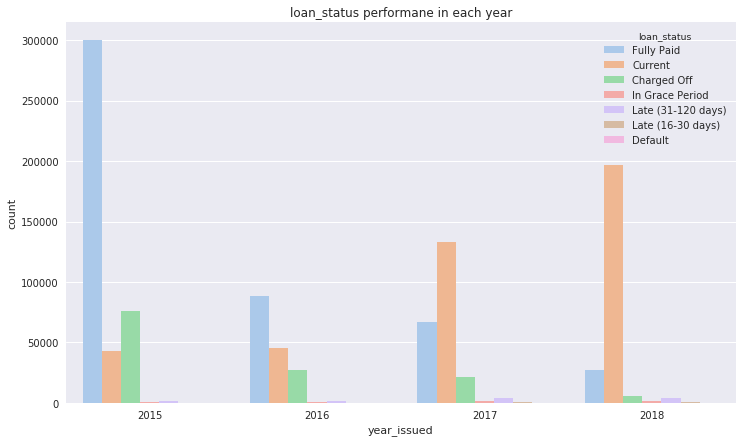

In [0]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'year_issued', data = loan_status_df, hue = 'loan_status', palette = 'pastel')
plt.title('loan_status performane in each year')

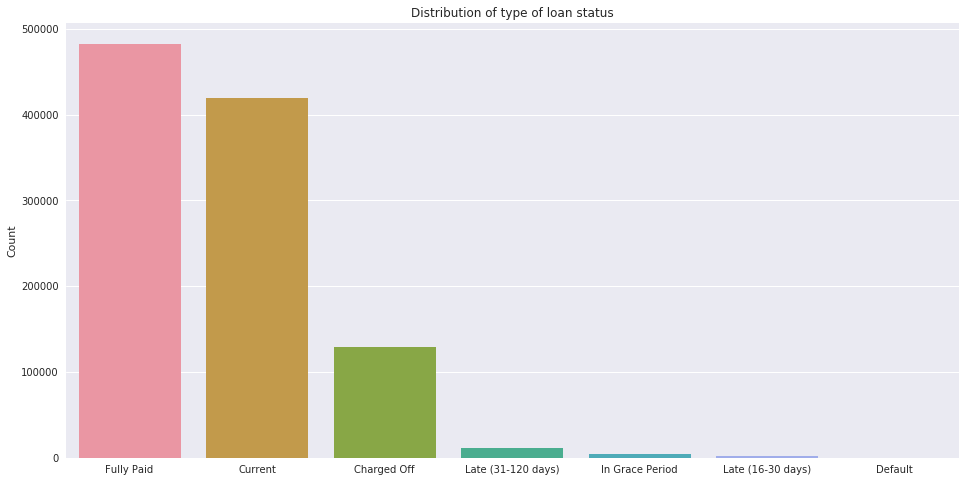

In [0]:
variable_to_check = "loan_status"

sns.barplot( loan_status_df[variable_to_check].value_counts().index, loan_status_df[variable_to_check].value_counts() )
plt.ylabel("Count")
plt.title("Distribution of type of loan status")
plt.show()
display(loan_status_df[variable_to_check].value_counts())

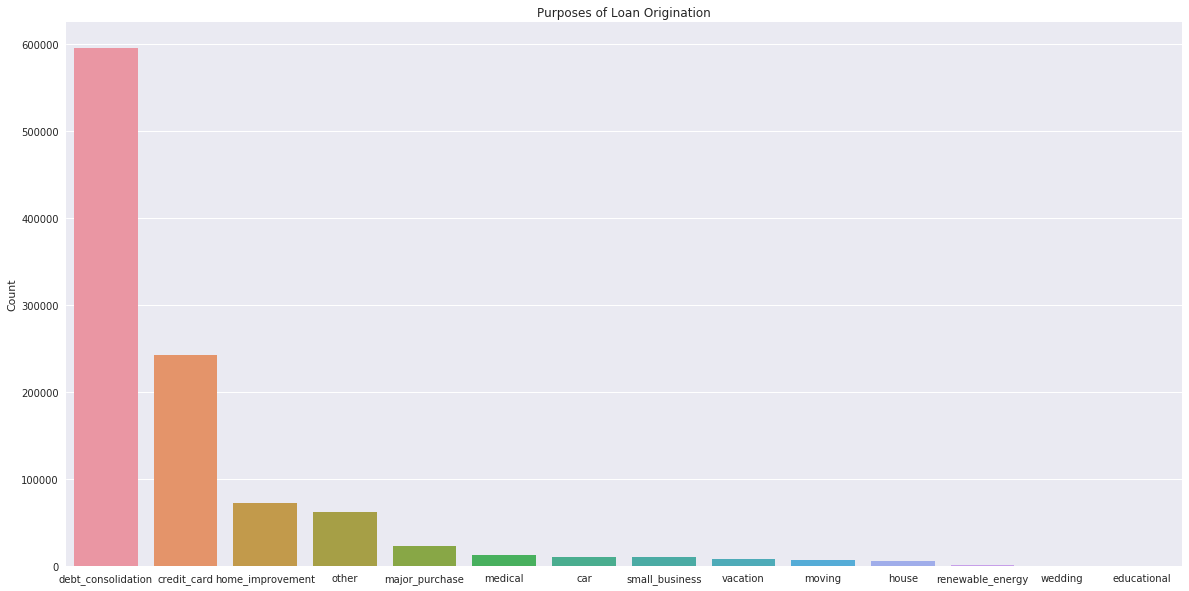

In [0]:
variable_to_check = "purpose"
plt.figure(figsize=(20,10))
sns.barplot( loan_status_df[variable_to_check].value_counts().index, loan_status_df[variable_to_check].value_counts() )
plt.ylabel("Count")
plt.title("Purposes of Loan Origination")
plt.show()
display(loan_status_df[variable_to_check].value_counts())

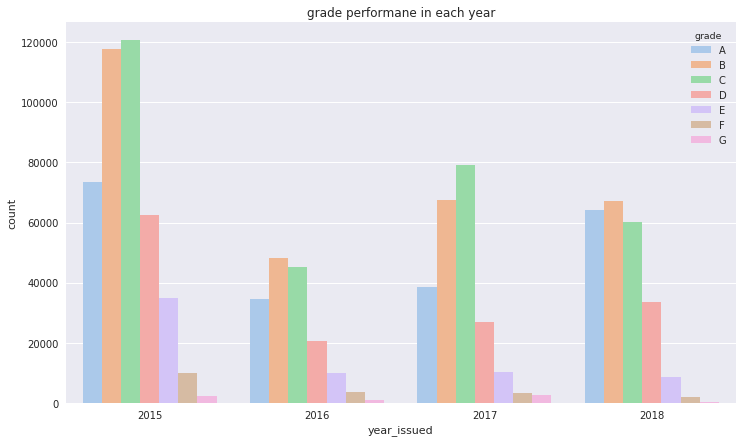

In [0]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'year_issued', data = loan_status_df, hue = 'grade', palette = 'pastel')
plt.title('grade performane in each year')

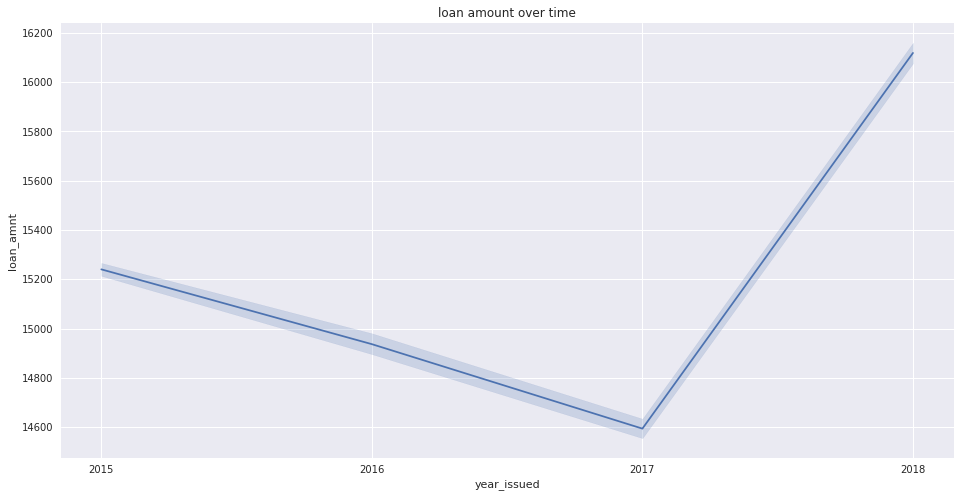

In [0]:
sns.lineplot(data=loan_status_df, 
             x='year_issued', 
             y='loan_amnt').set_title('loan amount over time');

##Feature Engineering (Preparing Data For Use With Machine Learning Algorithms)

In [0]:
Ml_df = loan_status_df[["int_rate","loan_amnt","installment", "annual_inc", "dti", "delinq_2yrs",  "fico_range_low","loan_status", "fico_range_high", "inq_last_6mths", "mths_since_last_delinq","mths_since_last_record",  "open_acc", "pub_rec",  "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv",                     "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"]]
Ml_df

int_rate 
 loan_amnt 
 installment 
 annual_inc 
 dti 
 delinq_2yrs 
 fico_range_low 
 loan_status 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 
 
 
 
 0 
 13.99 
 3600.0 
 123.03 
 55000 
 5.91 
 0 
 675 
 Fully Paid 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 
 
 1 
 11.99 
 24700.0 
 820.28 
 65000 
 16.06 
 1 
 715 
 Fully Paid 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 
 
 2 
 10.78 
 20000.0 
 432.66 
 63000 
 10.78 
 0 
 695 
 Fully Paid 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 
 
 3 
 14.85 
 35000.0 
 829.90 
 110000 
 17.06 
 0 
 785 
 Current 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 
 
 4 
 22.45 
 10400.0 
 289.91 
 104433 
 25.37 
 1 
 695 
 Fully Paid 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 16.29 
 14400.0 
 508.33 
 45000 
 33.76 
 0 
 675 
 Charged Off 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 
 
 1048571 
 11.47 
 10000.0 
 329.62 
 135000 
 26.41 
 1 
 665 
 Fully Paid 
 669.0 
 0 
 15.0 
 NaN 
 22.0 
 0.0 
 23617.0 
 71.1 
 37.0 
 0 
 0.00 
 11914.71873 
 11914.72 
 10000.00 
 1914.72 
 0.0 
 0.0 
 0.0 
 1002.22 
 
 
 1048572 
 10.75 
 16000.0 
 521.93 
 70000 
 21.67 
 0 
 710 
 Fully Paid 
 714.0 
 0 
 NaN 
 NaN 
 16.0 
 0.0 
 45926.0 
 55.2 
 30.0 
 0 
 0.00 
 18727.5152 
 18727.52 
 16000.00 
 2727.52 
 0.0 
 0.0 
 0.0 
 2303.27 
 
 
 1048573 
 7.89 
 6000.0 
 187.72 
 31500 
 25.98 
 0 
 715 
 Fully Paid 
 719.0 
 0 
 49.0 
 NaN 
 11.0 
 0.0 
 7564.0 
 27.6 
 35.0 
 0 
 0.00 
 6752.411954 
 6752.41 
 6000.00 
 752.41 
 0.0 
 0.0 
 0.0 
 187.47 
 
 
 1048574 
 6.49 
 1000.0 
 30.65 
 65000 
 8.33 
 0 
 755 
 Fully Paid 
 759.0 
 0 
 81.0 
 94.0 
 7.0 
 1.0 
 648.0 
 4.3 
 17.0 
 0 
 0.00 
 1026.21 
 1026.21 
 1000.00 
 26.21 
 0.0 
 0.0 
 0.0 
 904.33 
 
 
 
 1048561 rows × 27 columns

#Label good loan from dataset

In [0]:
import numpy as np

Ml_df['good_loan'] = np.where((Ml_df.loan_status == 'Fully Paid') | (Ml_df.loan_status == 'Current'), 0,1)

Ml_df

int_rate 
 loan_amnt 
 installment 
 annual_inc 
 dti 
 delinq_2yrs 
 fico_range_low 
 loan_status 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 good_loan 
 
 
 
 
 0 
 13.99 
 3600.0 
 123.03 
 55000 
 5.91 
 0 
 675 
 Fully Paid 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 0 
 
 
 1 
 11.99 
 24700.0 
 820.28 
 65000 
 16.06 
 1 
 715 
 Fully Paid 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 0 
 
 
 2 
 10.78 
 20000.0 
 432.66 
 63000 
 10.78 
 0 
 695 
 Fully Paid 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 0 
 
 
 3 
 14.85 
 35000.0 
 829.90 
 110000 
 17.06 
 0 
 785 
 Current 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 0 
 
 
 4 
 22.45 
 10400.0 
 289.91 
 104433 
 25.37 
 1 
 695 
 Fully Paid 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 16.29 
 14400.0 
 508.33 
 45000 
 33.76 
 0 
 675 
 Charged Off 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 1 
 
 
 1048571 
 11.47 
 10000.0 
 329.62 
 135000 
 26.41 
 1 
 665 
 Fully Paid 
 669.0 
 0 
 15.0 
 NaN 
 22.0 
 0.0 
 23617.0 
 71.1 
 37.0 
 0 
 0.00 
 11914.71873 
 11914.72 
 10000.00 
 1914.72 
 0.0 
 0.0 
 0.0 
 1002.22 
 0 
 
 
 1048572 
 10.75 
 16000.0 
 521.93 
 70000 
 21.67 
 0 
 710 
 Fully Paid 
 714.0 
 0 
 NaN 
 NaN 
 16.0 
 0.0 
 45926.0 
 55.2 
 30.0 
 0 
 0.00 
 18727.5152 
 18727.52 
 16000.00 
 2727.52 
 0.0 
 0.0 
 0.0 
 2303.27 
 0 
 
 
 1048573 
 7.89 
 6000.0 
 187.72 
 31500 
 25.98 
 0 
 715 
 Fully Paid 
 719.0 
 0 
 49.0 
 NaN 
 11.0 
 0.0 
 7564.0 
 27.6 
 35.0 
 0 
 0.00 
 6752.411954 
 6752.41 
 6000.00 
 752.41 
 0.0 
 0.0 
 0.0 
 187.47 
 0 
 
 
 1048574 
 6.49 
 1000.0 
 30.65 
 65000 
 8.33 
 0 
 755 
 Fully Paid 
 759.0 
 0 
 81.0 
 94.0 
 7.0 
 1.0 
 648.0 
 4.3 
 17.0 
 0 
 0.00 
 1026.21 
 1026.21 
 1000.00 
 26.21 
 0.0 
 0.0 
 0.0 
 904.33 
 0 
 
 
 
 1048561 rows × 28 columns

In [0]:
Ml_df['good_loan'].unique()

Out[36]: array([0, 1])

In [0]:
Ml_dff = Ml_df
Ml_dff

int_rate 
 loan_amnt 
 installment 
 annual_inc 
 dti 
 delinq_2yrs 
 fico_range_low 
 loan_status 
 fico_range_high 
 inq_last_6mths 
 mths_since_last_delinq 
 mths_since_last_record 
 open_acc 
 pub_rec 
 revol_bal 
 revol_util 
 total_acc 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 recoveries 
 collection_recovery_fee 
 last_pymnt_amnt 
 good_loan 
 
 
 
 
 0 
 13.99 
 3600.0 
 123.03 
 55000 
 5.91 
 0 
 675 
 Fully Paid 
 679.0 
 1 
 30.0 
 NaN 
 7.0 
 0.0 
 2765.0 
 29.7 
 13.0 
 0 
 0.00 
 4421.723917 
 4421.72 
 3600.00 
 821.72 
 0.0 
 0.0 
 0.0 
 122.67 
 0 
 
 
 1 
 11.99 
 24700.0 
 820.28 
 65000 
 16.06 
 1 
 715 
 Fully Paid 
 719.0 
 4 
 6.0 
 NaN 
 22.0 
 0.0 
 21470.0 
 19.2 
 38.0 
 0 
 0.00 
 25679.66 
 25679.66 
 24700.00 
 979.66 
 0.0 
 0.0 
 0.0 
 926.35 
 0 
 
 
 2 
 10.78 
 20000.0 
 432.66 
 63000 
 10.78 
 0 
 695 
 Fully Paid 
 699.0 
 0 
 NaN 
 NaN 
 6.0 
 0.0 
 7869.0 
 56.2 
 18.0 
 0 
 0.00 
 22705.92429 
 22705.92 
 20000.00 
 2705.92 
 0.0 
 0.0 
 0.0 
 15813.3 
 0 
 
 
 3 
 14.85 
 35000.0 
 829.90 
 110000 
 17.06 
 0 
 785 
 Current 
 789.0 
 0 
 NaN 
 NaN 
 13.0 
 0.0 
 7802.0 
 11.6 
 17.0 
 15897.65 
 15897.65 
 31464.01 
 31464.01 
 19102.35 
 12361.66 
 0.0 
 0.0 
 0.0 
 829.9 
 0 
 
 
 4 
 22.45 
 10400.0 
 289.91 
 104433 
 25.37 
 1 
 695 
 Fully Paid 
 699.0 
 3 
 12.0 
 NaN 
 12.0 
 0.0 
 21929.0 
 64.5 
 35.0 
 0 
 0.00 
 11740.5 
 11740.50 
 10400.00 
 1340.50 
 0.0 
 0.0 
 0.0 
 10128.96 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048570 
 16.29 
 14400.0 
 508.33 
 45000 
 33.76 
 0 
 675 
 Charged Off 
 679.0 
 0 
 NaN 
 NaN 
 9.0 
 0.0 
 20018.0 
 65.8 
 15.0 
 0 
 0.00 
 8996.63 
 8996.63 
 2281.17 
 1205.46 
 0.0 
 5510.0 
 991.8 
 508.33 
 1 
 
 
 1048571 
 11.47 
 10000.0 
 329.62 
 135000 
 26.41 
 1 
 665 
 Fully Paid 
 669.0 
 0 
 15.0 
 NaN 
 22.0 
 0.0 
 23617.0 
 71.1 
 37.0 
 0 
 0.00 
 11914.71873 
 11914.72 
 10000.00 
 1914.72 
 0.0 
 0.0 
 0.0 
 1002.22 
 0 
 
 
 1048572 
 10.75 
 16000.0 
 521.93 
 70000 
 21.67 
 0 
 710 
 Fully Paid 
 714.0 
 0 
 NaN 
 NaN 
 16.0 
 0.0 
 45926.0 
 55.2 
 30.0 
 0 
 0.00 
 18727.5152 
 18727.52 
 16000.00 
 2727.52 
 0.0 
 0.0 
 0.0 
 2303.27 
 0 
 
 
 1048573 
 7.89 
 6000.0 
 187.72 
 31500 
 25.98 
 0 
 715 
 Fully Paid 
 719.0 
 0 
 49.0 
 NaN 
 11.0 
 0.0 
 7564.0 
 27.6 
 35.0 
 0 
 0.00 
 6752.411954 
 6752.41 
 6000.00 
 752.41 
 0.0 
 0.0 
 0.0 
 187.47 
 0 
 
 
 1048574 
 6.49 
 1000.0 
 30.65 
 65000 
 8.33 
 0 
 755 
 Fully Paid 
 759.0 
 0 
 81.0 
 94.0 
 7.0 
 1.0 
 648.0 
 4.3 
 17.0 
 0 
 0.00 
 1026.21 
 1026.21 
 1000.00 
 26.21 
 0.0 
 0.0 
 0.0 
 904.33 
 0 
 
 
 
 1048561 rows × 28 columns

In [0]:
# Remove the loan_status and mths_since_last_record the Type labels for the training data
Ml_dff = Ml_dff.dropna(how='any',axis=0) 
new_df = Ml_dff.drop(['mths_since_last_record', 'delinq_2yrs', 'inq_last_6mths',                              
'mths_since_last_delinq',                     
'mths_since_last_record' ,                     
'open_acc',                                    
'pub_rec',                                     
'revol_bal' ,                                  
'revol_util' ,                                 
'total_acc' ,
'out_prncp' ,                                  
'out_prncp_inv',                               
'total_pymnt',                                 
'total_pymnt_inv',                             
'total_rec_prncp',                             
'total_rec_int',                               
'total_rec_late_fee',                          
'recoveries',                                  
'collection_recovery_fee',  
'last_pymnt_amnt'], axis=1)


new_df

int_rate 
 loan_amnt 
 installment 
 annual_inc 
 dti 
 fico_range_low 
 loan_status 
 fico_range_high 
 good_loan 
 
 
 
 
 21 
 14.85 
 16000.0 
 379.39 
 48000 
 33.18 
 685 
 Fully Paid 
 689.0 
 0 
 
 
 30 
 12.88 
 16000.0 
 538.18 
 65000 
 18.96 
 675 
 Charged Off 
 679.0 
 1 
 
 
 32 
 10.78 
 12000.0 
 391.62 
 98000 
 24.04 
 690 
 Fully Paid 
 694.0 
 0 
 
 
 34 
 12.88 
 16800.0 
 381.23 
 118000 
 34.29 
 680 
 Current 
 684.0 
 0 
 
 
 42 
 13.99 
 16000.0 
 372.21 
 142000 
 17.74 
 680 
 Current 
 684.0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048521 
 13.67 
 10000.0 
 230.98 
 35000 
 22.98 
 675 
 Current 
 679.0 
 0 
 
 
 1048545 
 13.67 
 9000.0 
 306.16 
 28000 
 43.68 
 675 
 Charged Off 
 679.0 
 1 
 
 
 1048552 
 12.99 
 10000.0 
 336.90 
 65000 
 17.17 
 690 
 Fully Paid 
 694.0 
 0 
 
 
 1048555 
 11.47 
 7200.0 
 237.33 
 80000 
 16.76 
 670 
 Fully Paid 
 674.0 
 0 
 
 
 1048574 
 6.49 
 1000.0 
 30.65 
 65000 
 8.33 
 755 
 Fully Paid 
 759.0 
 0 
 
 
 
 82364 rows × 9 columns

In [0]:
#Convert annual income to float data type
new_df['annual_inc'] = new_df['annual_inc'].astype('float')

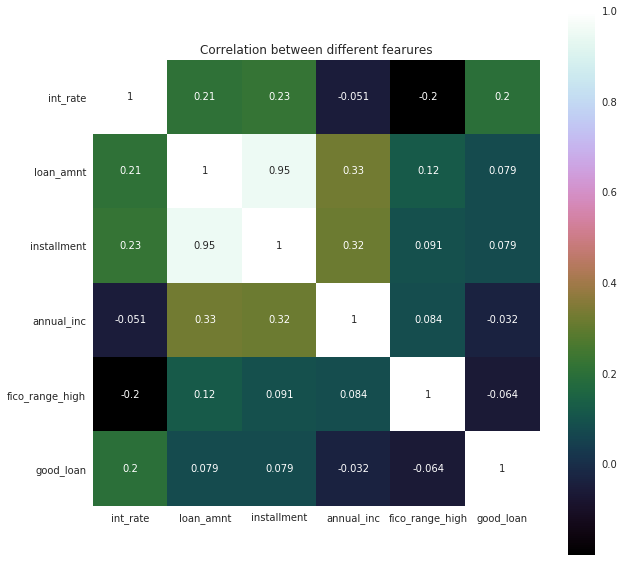

In [0]:
#Correlation between features
correlation = new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [0]:
# Remove the good_loan and the loan_status labels for the training data
X = new_df.drop(['good_loan', 'loan_status'], axis=1)

# Labels
y = new_df['good_loan']

# Let's see the data
X

int_rate 
 loan_amnt 
 installment 
 annual_inc 
 dti 
 fico_range_low 
 fico_range_high 
 
 
 
 
 21 
 14.85 
 16000.0 
 379.39 
 48000.0 
 33.18 
 685 
 689.0 
 
 
 30 
 12.88 
 16000.0 
 538.18 
 65000.0 
 18.96 
 675 
 679.0 
 
 
 32 
 10.78 
 12000.0 
 391.62 
 98000.0 
 24.04 
 690 
 694.0 
 
 
 34 
 12.88 
 16800.0 
 381.23 
 118000.0 
 34.29 
 680 
 684.0 
 
 
 42 
 13.99 
 16000.0 
 372.21 
 142000.0 
 17.74 
 680 
 684.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1048521 
 13.67 
 10000.0 
 230.98 
 35000.0 
 22.98 
 675 
 679.0 
 
 
 1048545 
 13.67 
 9000.0 
 306.16 
 28000.0 
 43.68 
 675 
 679.0 
 
 
 1048552 
 12.99 
 10000.0 
 336.90 
 65000.0 
 17.17 
 690 
 694.0 
 
 
 1048555 
 11.47 
 7200.0 
 237.33 
 80000.0 
 16.76 
 670 
 674.0 
 
 
 1048574 
 6.49 
 1000.0 
 30.65 
 65000.0 
 8.33 
 755 
 759.0 
 
 
 
 82364 rows × 7 columns

In [0]:
from sklearn.preprocessing import StandardScaler
#fitting the train data 
X_std = StandardScaler().fit_transform(X)
X_std.shape

Out[42]: (82364, 7)

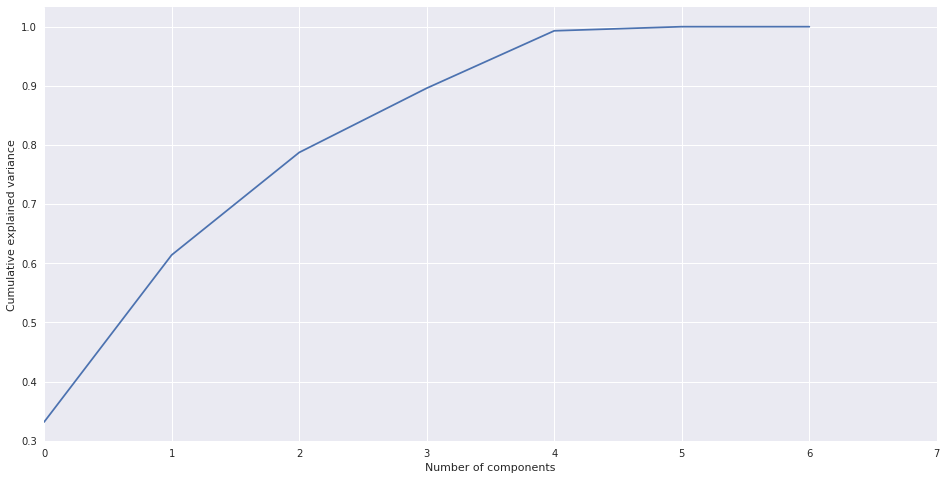

In [0]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

###Decision Tree Classifier — Pyspark Implementation

In [0]:

from pyspark.sql import SparkSession
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(new_df) 
sparkDF.printSchema()
sparkDF.show()


root
-- int_rate: double (nullable = true)
-- loan_amnt: double (nullable = true)
-- installment: double (nullable = true)
-- annual_inc: double (nullable = true)
-- dti: string (nullable = true)
-- fico_range_low: string (nullable = true)
-- loan_status: string (nullable = true)
-- fico_range_high: double (nullable = true)
-- good_loan: long (nullable = true)

+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+
int_rate|loan_amnt|installment|annual_inc| dti|fico_range_low|loan_status|fico_range_high|good_loan|
+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+
 14.85| 16000.0| 379.39| 48000.0|33.18| 685| Fully Paid| 689.0| 0|
 12.88| 16000.0| 538.18| 65000.0|18.96| 675|Charged Off| 679.0| 1|
 10.78| 12000.0| 391.62| 98000.0|24.04| 690| Fully Paid| 694.0| 0|
 12.88| 16800.0| 381.23| 118000.0|34.29| 680| Current| 684.0| 0|
 13.99| 16000.0| 372.21| 142000.0|17.74| 680| Current| 684.0| 0|
 15.77| 7200.0| 252.32| 55000.0|17.35| 680| Fully Paid| 684.0| 0|
 16.59| 10000.0| 246.33| 30000.0|30.84| 715| Fully Paid| 719.0| 0|
 17.27| 2400.0| 85.89| 52000.0|28.38| 670| Fully Paid| 674.0| 0|
 13.99| 10800.0| 251.25| 40000.0|26.13| 665| Fully Paid| 669.0| 0|
 8.49| 10500.0| 331.42| 60000.0|15.39| 685| Fully Paid| 689.0| 0|
 11.99| 5000.0| 166.05| 30000.0| 9.16| 675|Charged Off| 679.0| 1|
 9.8| 16000.0| 514.78| 99906.0| 6.97| 660| Fully Paid| 664.0| 0|
 18.49| 14875.0| 381.71| 37231.0| 36.3| 665|Charged Off| 669.0| 1|
 17.97| 23525.0| 597.0| 70000.0|13.33| 675| Fully Paid| 679.0| 0|
 18.49| 30000.0| 769.83| 85000.0|35.93| 665| Current| 669.0| 0|
 11.99| 4325.0| 143.64| 90000.0|16.96| 730| Fully Paid| 734.0| 0|
 7.91| 5875.0| 183.86| 70000.0| 9.53| 670| Fully Paid| 674.0| 0|
 18.49| 30000.0| 769.83| 300000.0| 8.62| 680| Current| 684.0| 0|
 11.99| 16800.0| 557.93| 50000.0| 5.76| 675| Fully Paid| 679.0| 0|
 14.85| 6025.0| 208.42| 110000.0|21.32| 665| Fully Paid| 669.0| 0|
+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+
only showing top 20 rows

###VectorAssembler

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler# transformer
vector_assembler = VectorAssembler(inputCols=["int_rate", "loan_amnt", "installment", "annual_inc", "fico_range_high"],outputCol="features")
df_temp = vector_assembler.transform(sparkDF)
df_temp.show(3)

+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+--------------------+
int_rate|loan_amnt|installment|annual_inc| dti|fico_range_low|loan_status|fico_range_high|good_loan| features|
+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+--------------------+
 14.85| 16000.0| 379.39| 48000.0|33.18| 685| Fully Paid| 689.0| 0|[14.85,16000.0,37...|
 12.88| 16000.0| 538.18| 65000.0|18.96| 675|Charged Off| 679.0| 1|[12.88,16000.0,53...|
 10.78| 12000.0| 391.62| 98000.0|24.04| 690| Fully Paid| 694.0| 0|[10.78,12000.0,39...|
+--------+---------+-----------+----------+-----+--------------+-----------+---------------+---------+--------------------+
only showing top 3 rows

In [0]:
# drop the original data features column
df = df_temp.drop("int_rate", "loan_amnt", "installment", "annual_inc", "fico_range_high", "loan_status", "dti", "fico_range_low")
df.show(5)

+---------+--------------------+
good_loan| features|
+---------+--------------------+
 0|[14.85,16000.0,37...|
 1|[12.88,16000.0,53...|
 0|[10.78,12000.0,39...|
 0|[12.88,16800.0,38...|
 0|[13.99,16000.0,37...|
+---------+--------------------+
only showing top 5 rows

In [0]:
# data splitting
(training,testing) = df.randomSplit([0.8,0.2])

####Once the information has been analyzed, it is ready to be used. We can train our Decision Tree classifier using the pyspark.ml.classification library on our training data. Then we can make predictions based on our testing data.

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier# train our model using training data
dt = DecisionTreeClassifier(labelCol="good_loan", featuresCol="features")
model = dt.fit(training)# test our model and make predictions using testing data
predictions = model.transform(testing)
predictions.select("prediction", "good_loan").show(10)

predictions

+----------+---------+
prediction|good_loan|
+----------+---------+
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
+----------+---------+
only showing top 10 rows

Out[48]: DataFrame[good_loan: bigint, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="good_loan", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)


Test Error = 0.188869 
Accuracy = 0.811131

###Random Forest Classifier — Pyspark Implementation

In [0]:
from pyspark.ml.classification import RandomForestClassifier# train our model using training data
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf = RandomForestClassifier(labelCol="good_loan",featuresCol="features", numTrees=10)

model = rf.fit(training)# test our model and make predictions using testing data

predictions = model.transform(testing)

predictions.select("prediction", "good_loan").show(5)# evaluate the performance of the classifier

evaluator = MulticlassClassificationEvaluator(labelCol="good_loan",predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

+----------+---------+
prediction|good_loan|
+----------+---------+
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
 0.0| 0|
+----------+---------+
only showing top 5 rows

Test Error = 0.188327
Accuracy = 0.811673